In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score, classification_report

sns.set_theme(style="whitegrid")

In [5]:
def hist_box_plot(df, coluna, altura=15, largura=5):
    fig, axes = plt.subplots(1, 2, figsize=(altura, largura))
    sns.histplot(ax=axes[0], data = df[coluna]);
    axes[0].set_title(f'Histograma {coluna}')
    sns.boxplot(ax=axes[1], data = df[coluna]);
    axes[1].set_title(f'Boxplot {coluna}')
    plt.show();


In [6]:
df_cancer_mama = pd.read_csv('breast-cancer.csv')

In [7]:
df_cancer_mama = df_cancer_mama[[c for c in df_cancer_mama.columns if (('_se' not in c) and ('_worst' not in c))]]
df_cancer_mama.drop('id', axis=1, inplace=True)

In [8]:
df_cancer_mama.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [9]:
df_cancer_mama.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


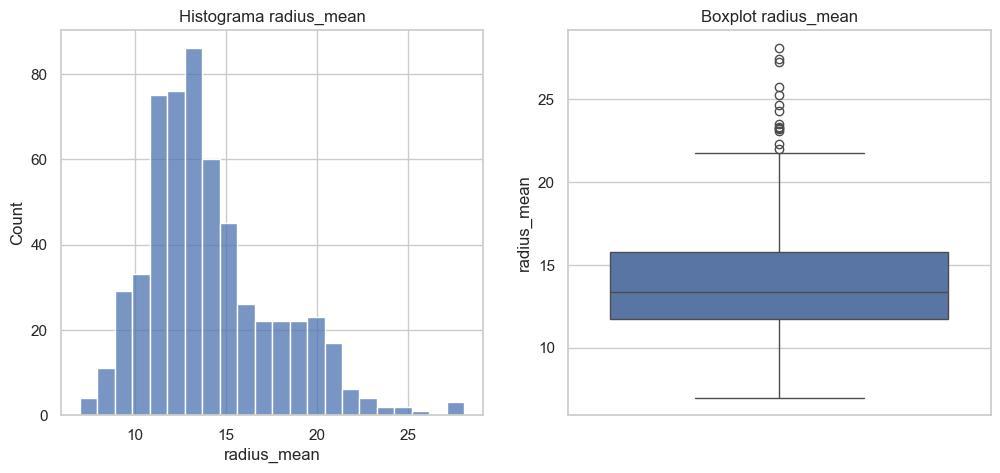

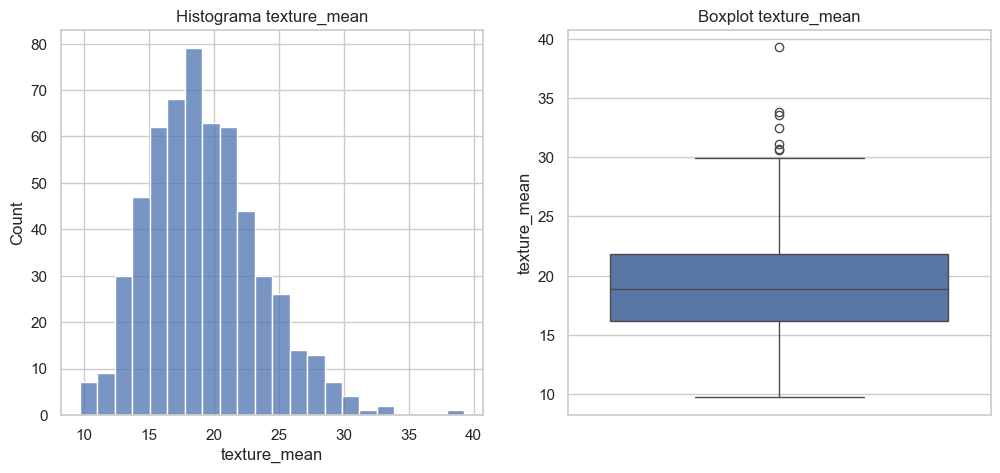

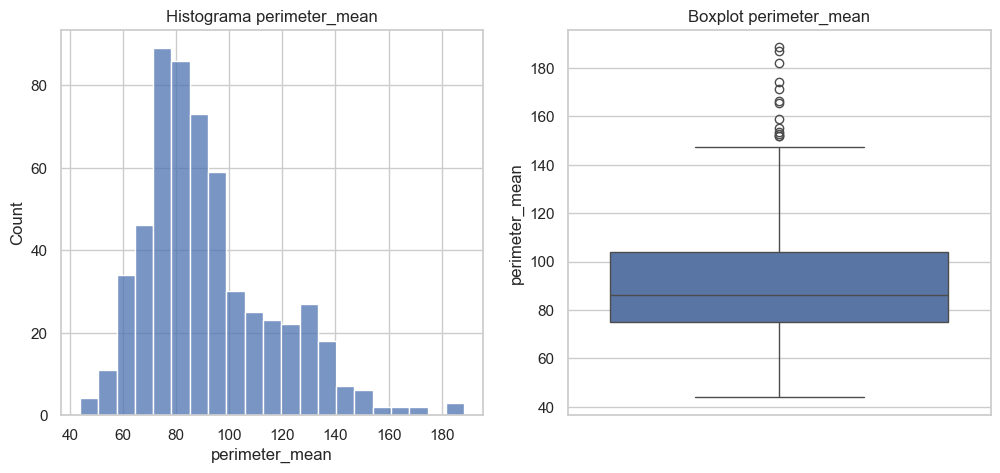

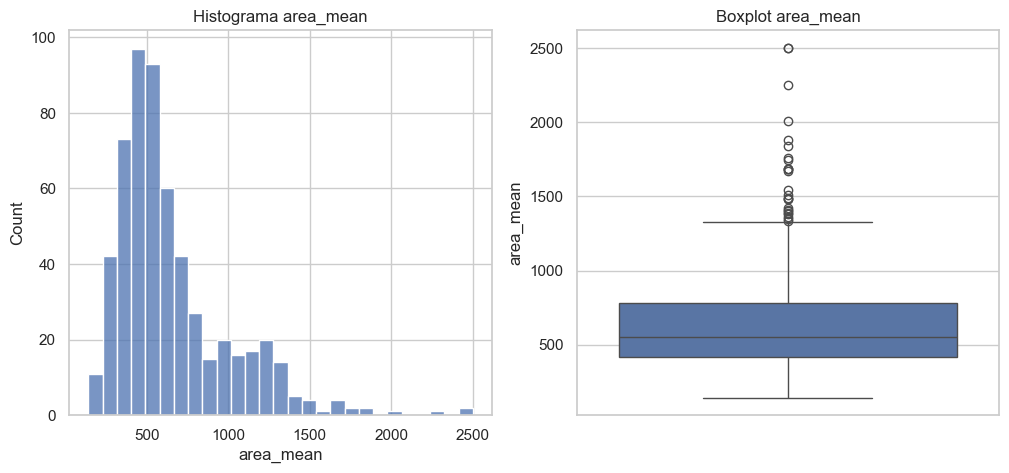

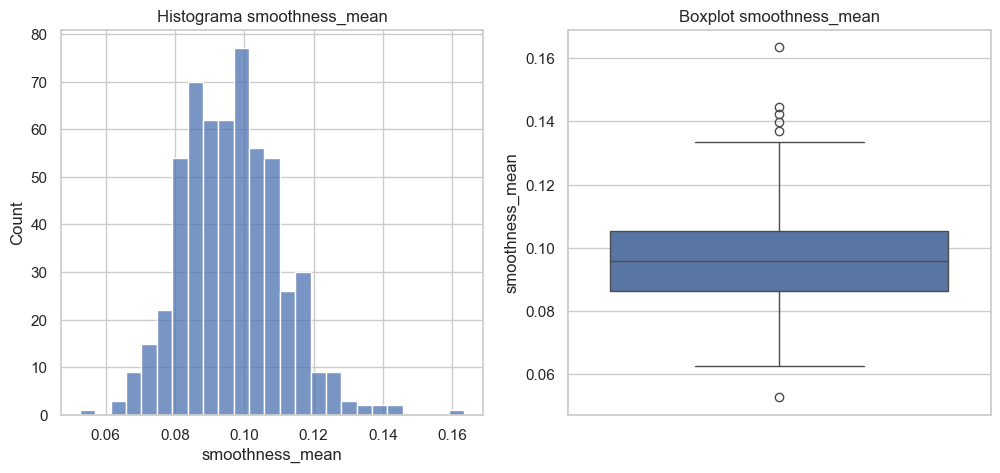

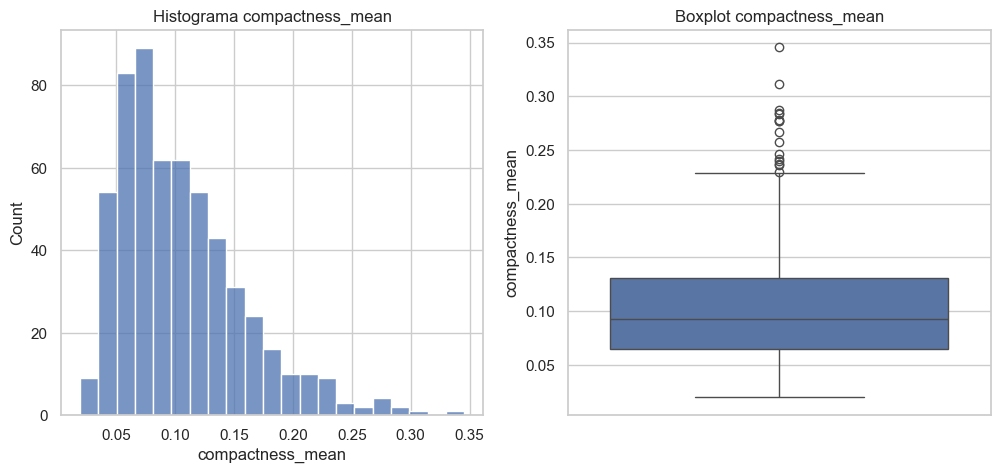

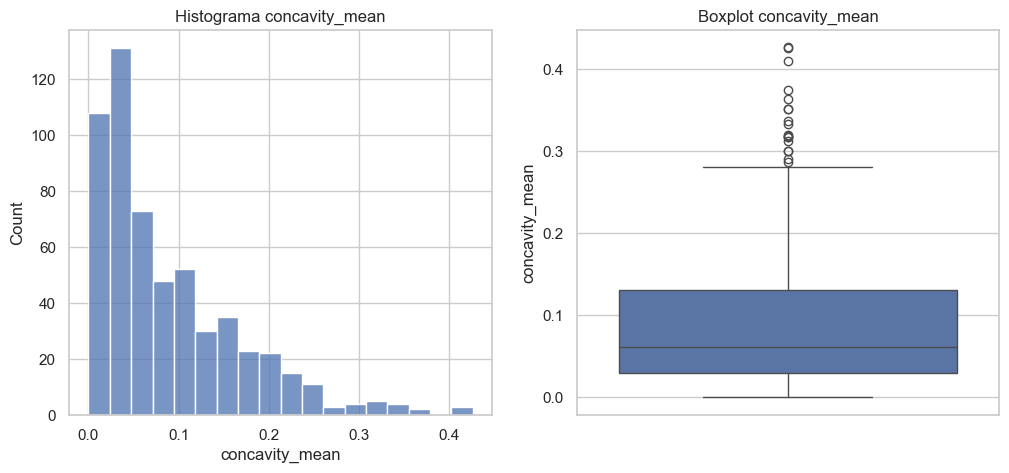

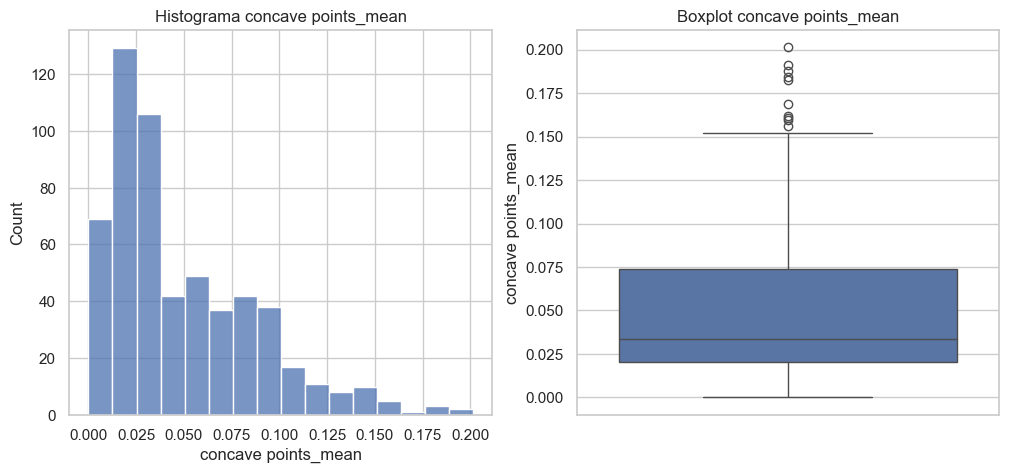

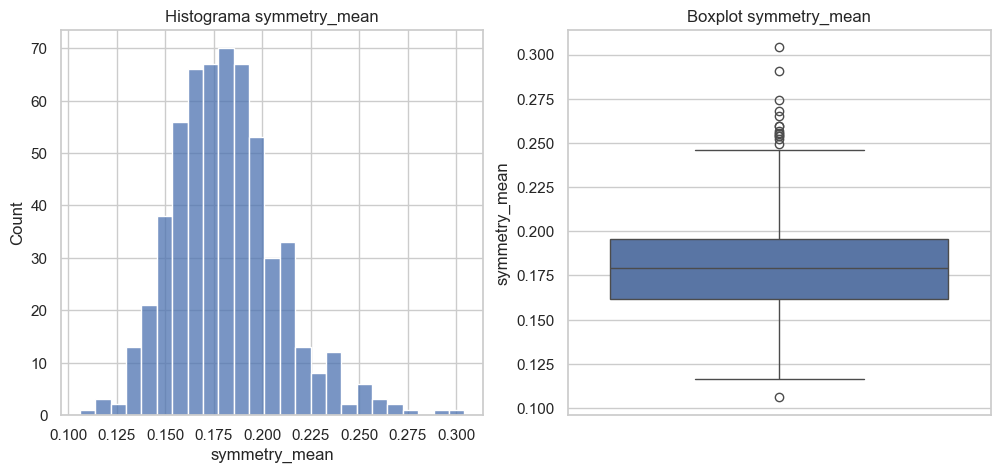

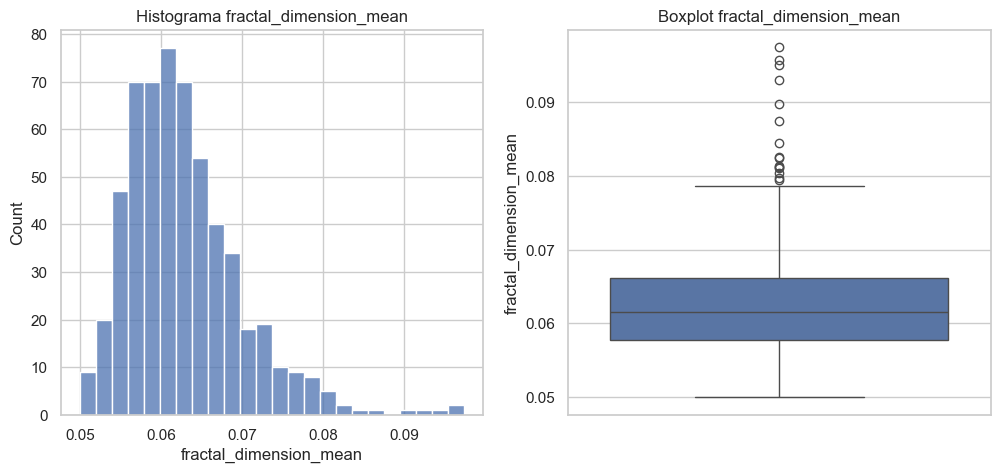

In [10]:
for col in df_cancer_mama.iloc[:, 1:].columns:
    hist_box_plot(df_cancer_mama, coluna=col, altura=12)

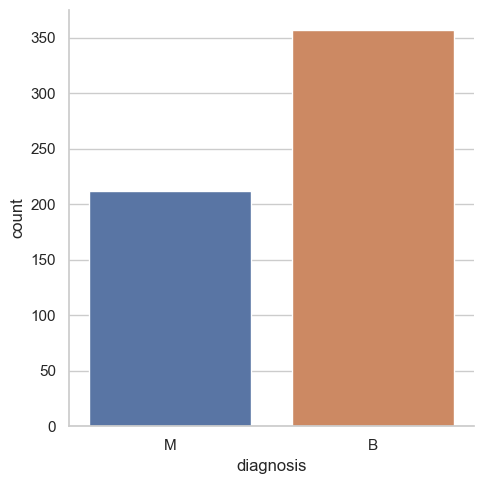

In [11]:
sns.catplot(data=df_cancer_mama, x='diagnosis', kind='count', hue='diagnosis')

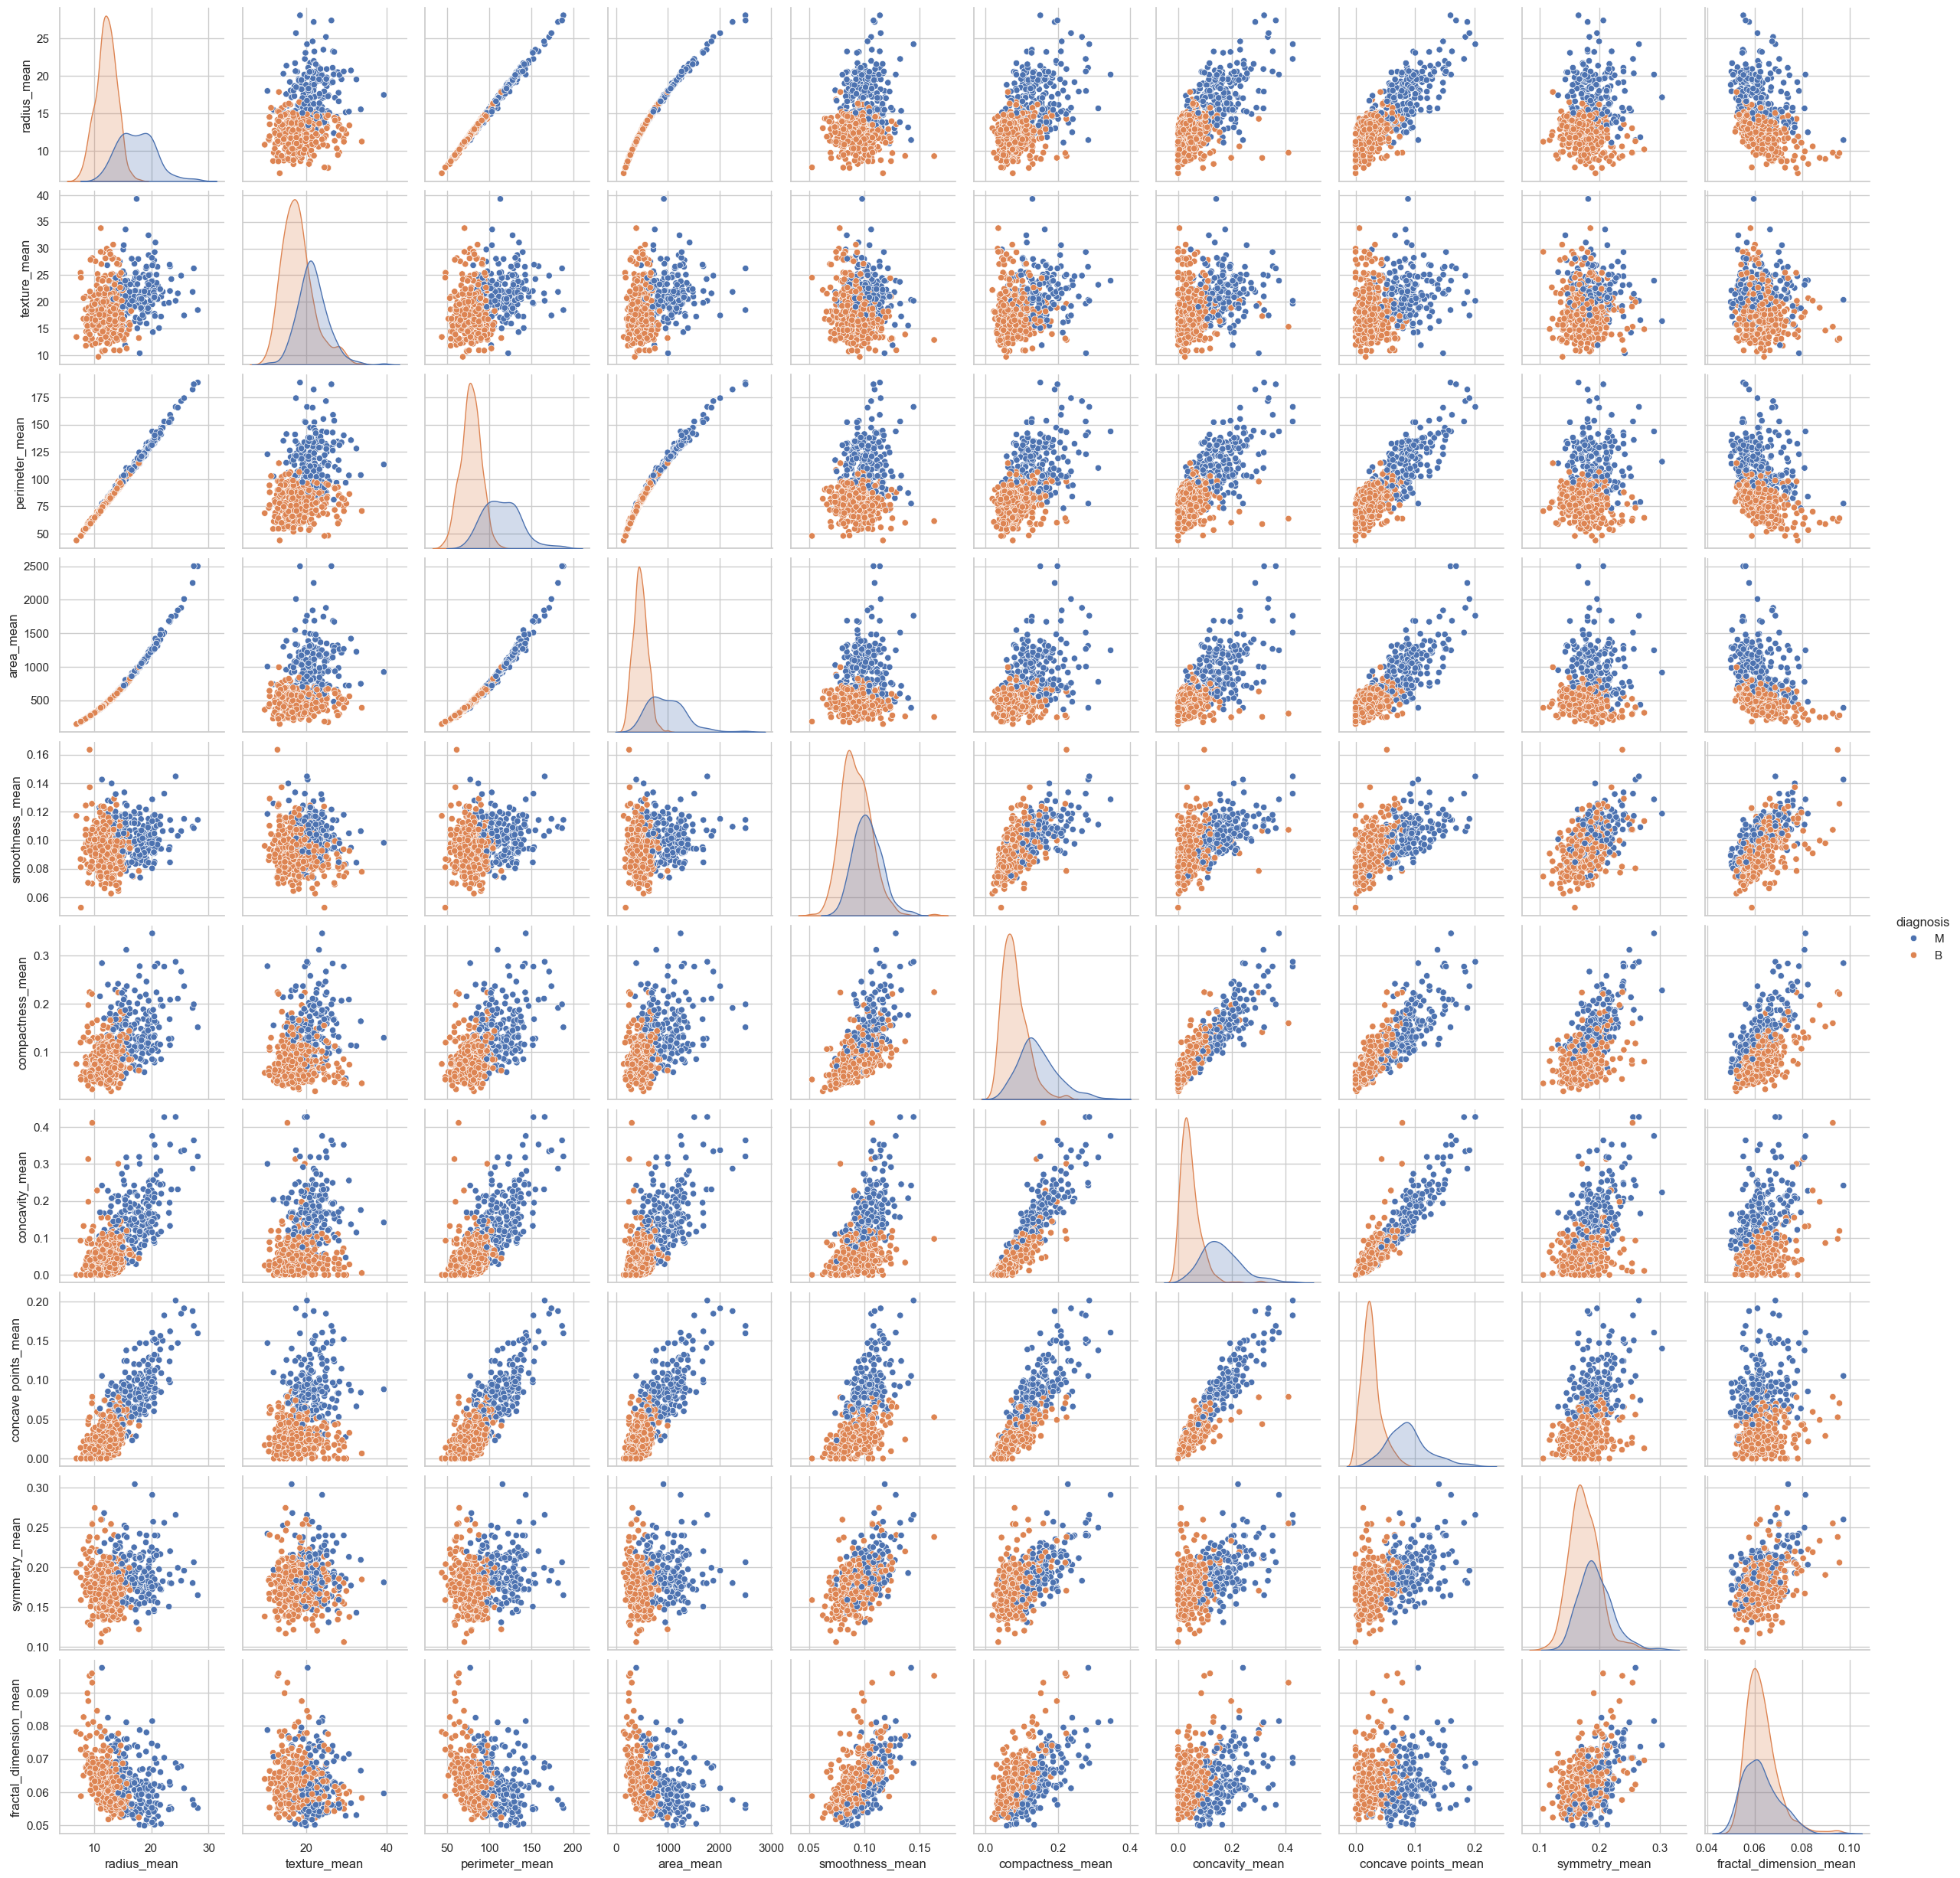

In [12]:
sns.pairplot(df_cancer_mama, hue='diagnosis');

In [13]:
df_cancer_mama_2 = df_cancer_mama.copy()
df_cancer_mama_2['diagnosis'] = df_cancer_mama_2['diagnosis'].map({'M': 1, 'B': 0})

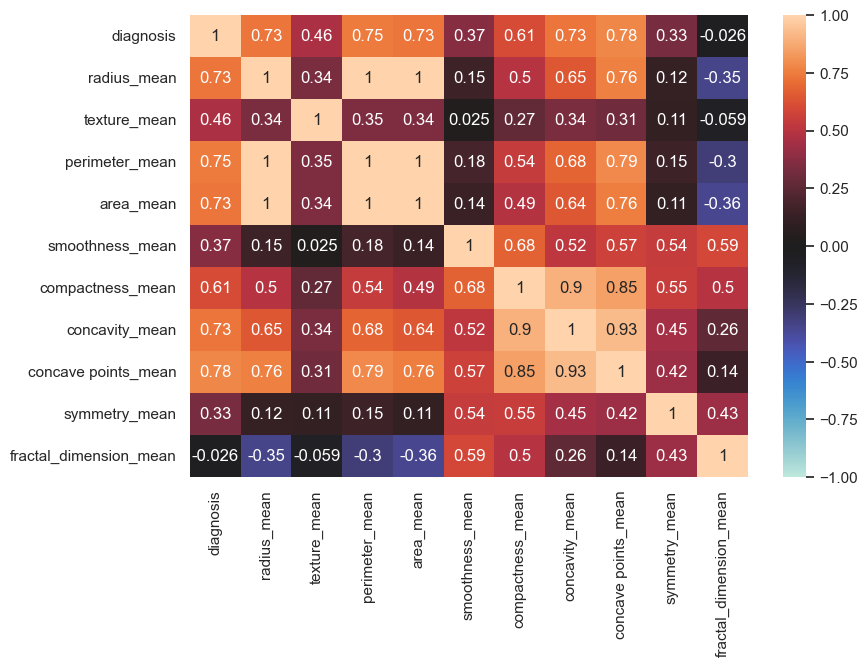

In [14]:
corr = df_cancer_mama_2.corr('spearman')
plt.figure(figsize=(9, 6))
sns.heatmap(corr, vmin=-1, center=0, vmax=1, annot=True);

In [15]:
X = df_cancer_mama_2.drop('diagnosis', axis=1)

In [16]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [17]:
y = df_cancer_mama_2['diagnosis']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Accuracy: 0.9385964912280702
Precision: 1.0
F1: 0.9066666666666666
Recall: 0.8292682926829268
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        73
           1       1.00      0.83      0.91        41

    accuracy                           0.94       114
   macro avg       0.96      0.91      0.93       114
weighted avg       0.94      0.94      0.94       114



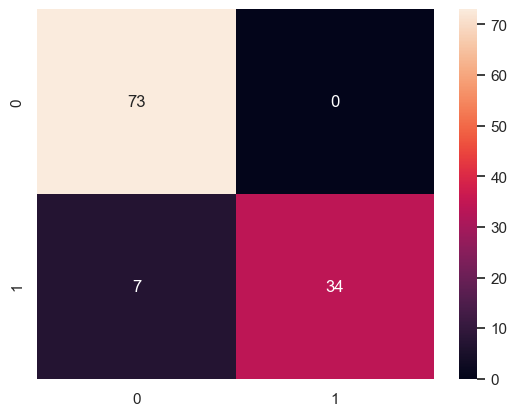

In [19]:
# Modelos
# Logistic Regression
model = LogisticRegression(random_state=123)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True);

Accuracy: 0.9210526315789473
Precision: 0.9
F1: 0.8888888888888888
Recall: 0.8780487804878049
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        73
           1       0.90      0.88      0.89        41

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



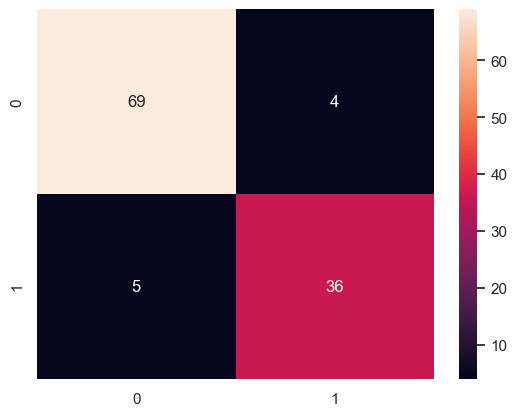

In [20]:
# Decision Tree Classifier
model = DecisionTreeClassifier(criterion='entropy', class_weight='balanced', random_state=123)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True);

Accuracy: 0.9736842105263158
Precision: 1.0
F1 Score: 0.9620253164556962
Recall: 0.926829268292683
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        73
           1       1.00      0.93      0.96        41

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



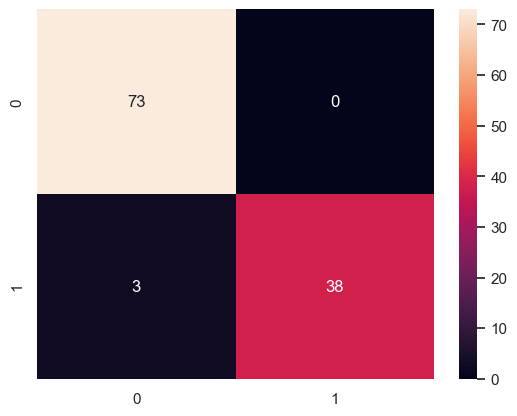

In [21]:
# Support Vector Machine
model = SVC(kernel='poly', class_weight='balanced', random_state=123)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True);

Accuracy: 0.9736842105263158
Precision: 0.975
F1: 0.9629629629629629
Recall: 0.9512195121951219
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        73
           1       0.97      0.95      0.96        41

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



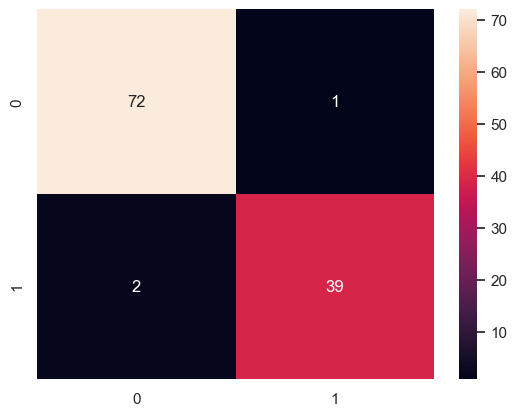

In [22]:
# Random Forest Classifier
model = RandomForestClassifier(n_estimators=500, max_depth=3, random_state=123)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True);

In [23]:
# Deployment using Streamlit
# Save the trained model
import joblib
joblib.dump(model, 'breast_cancer_model.pkl')

['breast_cancer_model.pkl']